In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import math


In [6]:
day_minus_two_prices_path = "../data/round1/prices_round_1_day_-2.csv"
day_minus_one_prices_path = "../data/round1/prices_round_1_day_-1.csv"
day_zero_prices_path = "../data/round1/prices_round_1_day_0.csv"

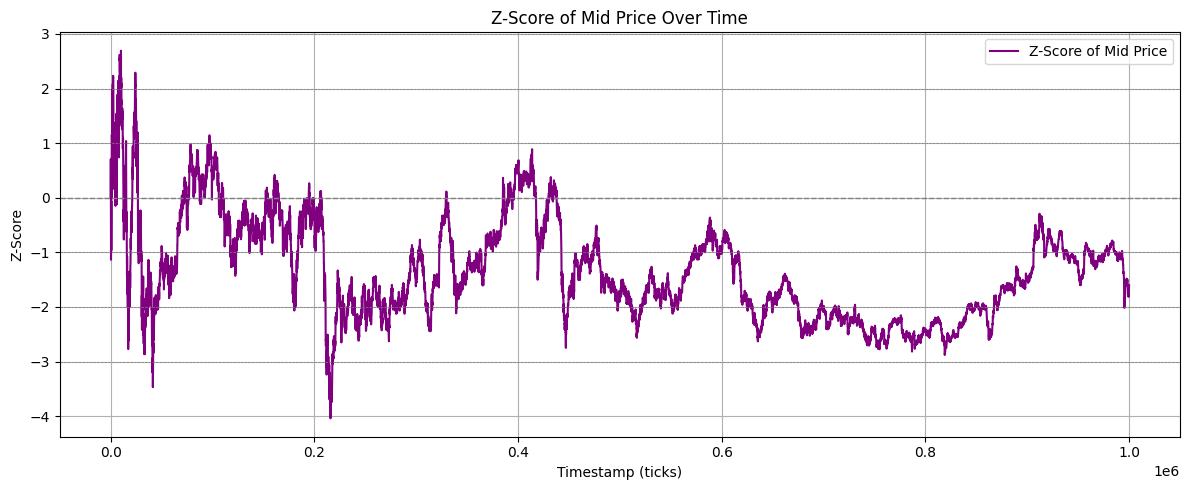

In [12]:
df = pd.read_csv(day_zero_prices_path, sep=';')
df_squid = df[df['product'] == 'SQUID_INK'].copy()

# print(df_squid.head())

# test on x rows. x = 20,000 rn
rolling_window = 20000

df_squid['rolling_mean'] = df_squid['mid_price'].rolling(window=rolling_window, min_periods=1).mean()
df_squid['rolling_std'] = df_squid['mid_price'].rolling(window=rolling_window, min_periods=1).std()

# Calculate z-score
df_squid['mid_price_zscore'] = (df_squid['mid_price'] - df_squid['rolling_mean']) / df_squid['rolling_std']
df_squid['mid_price_zscore'] = df_squid['mid_price_zscore'].replace([np.inf, -np.inf], np.nan).fillna(0)

plt.figure(figsize=(12, 5))
plt.plot(df_squid['timestamp'], df_squid['mid_price_zscore'], label='Z-Score of Mid Price', color='purple')

for z in [-3, -2, -1, 0, 1, 2, 3]:
    plt.axhline(y=z, color='gray', linestyle='--', linewidth=0.5 if z != 0 else 1)

plt.title("Z-Score of Mid Price Over Time")
plt.xlabel("Timestamp (ticks)")
plt.ylabel("Z-Score")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

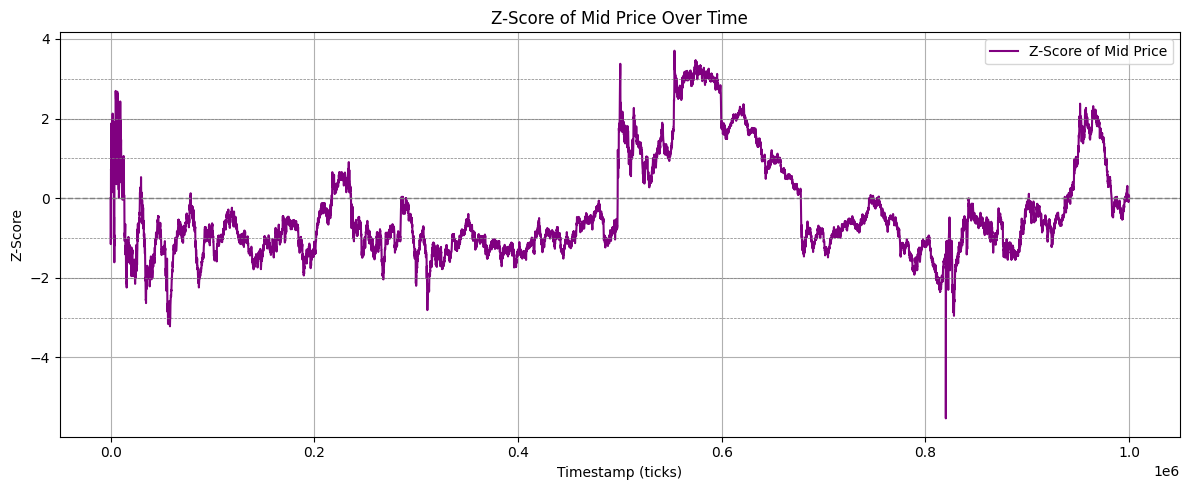

In [13]:
df = pd.read_csv(day_minus_one_prices_path, sep=';')
df_squid = df[df['product'] == 'SQUID_INK'].copy()

# print(df_squid.head())

# test on x rows. x = 20,000 rn
rolling_window = 20000

df_squid['rolling_mean'] = df_squid['mid_price'].rolling(window=rolling_window, min_periods=1).mean()
df_squid['rolling_std'] = df_squid['mid_price'].rolling(window=rolling_window, min_periods=1).std()

# Calculate z-score
df_squid['mid_price_zscore'] = (df_squid['mid_price'] - df_squid['rolling_mean']) / df_squid['rolling_std']
df_squid['mid_price_zscore'] = df_squid['mid_price_zscore'].replace([np.inf, -np.inf], np.nan).fillna(0)

plt.figure(figsize=(12, 5))
plt.plot(df_squid['timestamp'], df_squid['mid_price_zscore'], label='Z-Score of Mid Price', color='purple')

for z in [-3, -2, -1, 0, 1, 2, 3]:
    plt.axhline(y=z, color='gray', linestyle='--', linewidth=0.5 if z != 0 else 1)

plt.title("Z-Score of Mid Price Over Time")
plt.xlabel("Timestamp (ticks)")
plt.ylabel("Z-Score")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

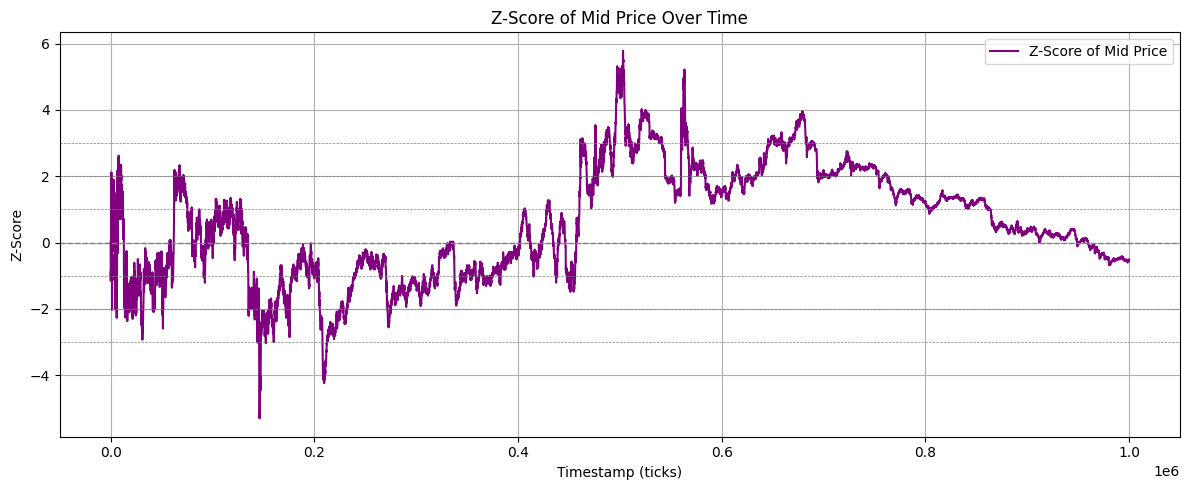

In [11]:
df = pd.read_csv(day_minus_two_prices_path, sep=';')
df_squid = df[df['product'] == 'SQUID_INK'].copy()

# print(df_squid.head())

# test on x rows. x = 20,000 rn
rolling_window = 20000

df_squid['rolling_mean'] = df_squid['mid_price'].rolling(window=rolling_window, min_periods=1).mean()
df_squid['rolling_std'] = df_squid['mid_price'].rolling(window=rolling_window, min_periods=1).std()

# Calculate z-score
df_squid['mid_price_zscore'] = (df_squid['mid_price'] - df_squid['rolling_mean']) / df_squid['rolling_std']
df_squid['mid_price_zscore'] = df_squid['mid_price_zscore'].replace([np.inf, -np.inf], np.nan).fillna(0)

plt.figure(figsize=(12, 5))
plt.plot(df_squid['timestamp'], df_squid['mid_price_zscore'], label='Z-Score of Mid Price', color='purple')

for z in [-3, -2, -1, 0, 1, 2, 3]:
    plt.axhline(y=z, color='gray', linestyle='--', linewidth=0.5 if z != 0 else 1)

plt.title("Z-Score of Mid Price Over Time")
plt.xlabel("Timestamp (ticks)")
plt.ylabel("Z-Score")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [28]:
def exp_leaf(x, k):
    y = np.where(x < 0, -(np.exp(-k * x) - 1), np.exp(k * x) - 1)
    return y / (np.exp(k) - 1)

def exp_leaf_inverse(y, k):
    y = np.clip(y, -1, 1)
    denom = np.exp(k) - 1
    return np.where(y < 0,
                    -1 / k * np.log(-y * denom + 1),
                     1 / k * np.log(y * denom + 1))

# Buy curve: inverse on left, exp on right
def buy_leaf(x, k):
    x = np.clip(x, -1, 1)
    y = np.zeros_like(x)
    y[x < 0] = exp_leaf_inverse(x[x < 0], k)
    y[x >= 0] = exp_leaf(x[x >= 0], k)
    return y

# Sell curve: original on left, inverse on right
def sell_leaf(x, k):
    x = np.clip(x, -1, 1)
    y = np.zeros_like(x)
    y[x < 0] = exp_leaf(x[x < 0], k)
    y[x >= 0] = exp_leaf_inverse(x[x >= 0], k)
    return y



map -1 <= x <= 1 to -4 <= x <= 4 to represent z-score
map -1 <= y <= 1 to -50 <= y <= 50 to represent z-score

/var/folders/8_/hy2vymsj6vxdlz1rqbn0zz5h0000gn/T/ipykernel_4883/3157147282.py:10: RuntimeWarning: invalid value encountered in log
  1 / k * np.log(y * denom + 1))
/var/folders/8_/hy2vymsj6vxdlz1rqbn0zz5h0000gn/T/ipykernel_4883/3157147282.py:9: RuntimeWarning: invalid value encountered in log
  -1 / k * np.log(-y * denom + 1),


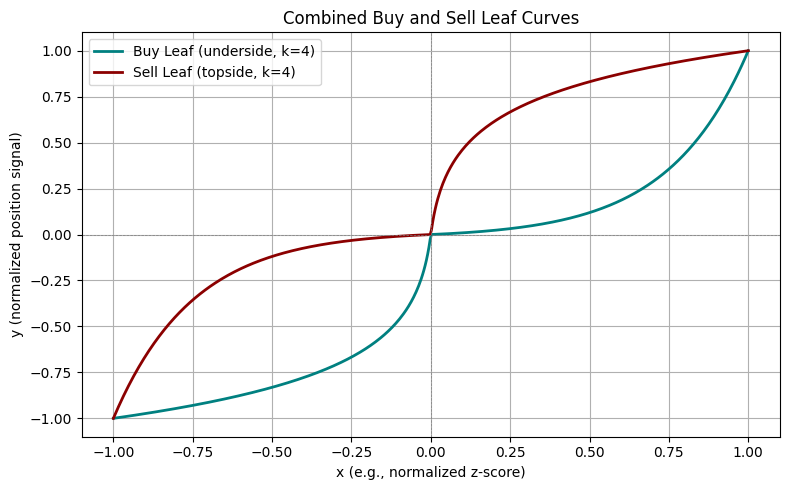

In [29]:
# Plot setup
x_vals = np.linspace(-1, 1, 500)
k = 4  # or experiment with k = 5

y_buy = buy_leaf(x_vals, k)
y_sell = sell_leaf(x_vals, k)

plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_buy, label=f'Buy Leaf (underside, k={k})', color='teal', linewidth=2)
plt.plot(x_vals, y_sell, label=f'Sell Leaf (topside, k={k})', color='darkred', linewidth=2)

# Plot reference lines
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)

plt.title("Combined Buy and Sell Leaf Curves")
plt.xlabel("x (e.g., normalized z-score)")
plt.ylabel("y (normalized position signal)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from datamodel import OrderDepth, UserId, TradingState, Order

class Trader:

    squink_df = pd.DataFrame(columns=[
        "timestamp", "product",
        "bid_price_1", "bid_volume_1", "bid_price_2", "bid_volume_2", "bid_price_3", "bid_volume_3",
        "ask_price_1", "ask_volume_1", "ask_price_2", "ask_volume_2", "ask_price_3", "ask_volume_3",
        "mid_price", "profit_and_loss"
    ])

    def update_df(df, product, state, orders, order_depth):
        buy_orders = sorted(order_depth.buy_orders.items(), key=lambda x: -x[0])
        sell_orders = sorted(order_depth.sell_orders.items(), key=lambda x: x[0])

        bid_levels = buy_orders[:3] + [(None, None)] * (3 - len(buy_orders))
        ask_levels = sell_orders[:3] + [(None, None)] * (3 - len(sell_orders))

        if bid_levels[0][0] is not None and ask_levels[0][0] is not None:
            mid_price = (bid_levels[0][0] + ask_levels[0][0]) / 2
        else:
            mid_price = None

        row = {
            "timestamp": state.timestamp,
            "product": product,
            "bid_price_1": bid_levels[0][0], "bid_volume_1": bid_levels[0][1],
            "bid_price_2": bid_levels[1][0], "bid_volume_2": bid_levels[1][1],
            "bid_price_3": bid_levels[2][0], "bid_volume_3": bid_levels[2][1],
            "ask_price_1": ask_levels[0][0], "ask_volume_1": ask_levels[0][1],
            "ask_price_2": ask_levels[1][0], "ask_volume_2": ask_levels[1][1],
            "ask_price_3": ask_levels[2][0], "ask_volume_3": ask_levels[2][1],
            "mid_price": mid_price,
        }

        df.loc[len(df)] = row

        if product == 'SQUID_INK':
            rolling_window = 20000
            Trader.squink_df['rolling_mean'] = Trader.squink_df['mid_price'].rolling(
                window=rolling_window,
                min_periods=1
            ).mean()

            Trader.squink_df['rolling_std'] = Trader.squink_df['mid_price'].rolling(
                window=rolling_window,
                min_periods=1
            ).std()

    def exp_leaf(x, k):
        y = np.where(x < 0, -(np.exp(-k * x) - 1), np.exp(k * x) - 1)
        return y / (np.exp(k) - 1)

    def exp_leaf_inverse(y, k):
        y = np.clip(y, -1, 1)
        denom = np.exp(k) - 1
        return np.where(y < 0,
                        -1 / k * np.log(-y * denom + 1),
                        1 / k * np.log(y * denom + 1))

    # Buy curve: inverse on left, exp on right
    def buy_leaf(x, k):
        x = np.clip(x, -1, 1)
        y = np.zeros_like(x)
        y[x < 0] = exp_leaf_inverse(x[x < 0], k)
        y[x >= 0] = exp_leaf(x[x >= 0], k)
        return y

    # Sell curve: original on left, inverse on right
    def sell_leaf(x, k):
        x = np.clip(x, -1, 1)
        y = np.zeros_like(x)
        y[x < 0] = exp_leaf(x[x < 0], k)
        y[x >= 0] = exp_leaf_inverse(x[x >= 0], k)
        return y
    
    def execute_edge_trade(self, state: TradingState):
        orders: list[Order] = []

        product = "SQUID_INK"
        df = Trader.squink_df

        order_depth: OrderDepth = state.order_depths[product]

        if df.empty or 'rolling_mean' not in df.columns or pd.isna(df.iloc[-1]['rolling_std']):
            return
        
        latest = df.iloc[-1]
        mid_price = latest['mid_price']
        mean = latest['rolling_mean']
        std = latest['rolling_std']

        if std == 0 or std is None or np.isnan(std):
            return
        
        z = (mid_price - mean) / std
        if z > 4:
            z = 4
        elif z < -4:
            z = -4

        # z_clipped = np.clip(z, -4, 4)

        # k = 4
        # buy_pos = int(round(Trader.buy_leaf(np.array([z_clipped / 4]), k)[0] * 50))
        # sell_pos = int(round(Trader.sell_leaf(np.array([z_clipped / 4]), k)[0] * 50))
        
        k = 4
        buy_pos = int(round(Trader.buy_leaf(z / 4, k) * 50))
        sell_pos = int(round(Trader.sell_leaf(z / 4, k) * 50))

        current_position = state.position.get(product, 0)
        buy_volume = max(0, buy_pos - current_position)
        sell_volume = max(0, current_position - sell_pos)

        if buy_volume > 0 and order_depth.sell_orders:
            best_ask = min(order_depth.sell_orders.keys())
            available_ask_volume = order_depth.sell_orders[best_ask]
            volume = min(buy_volume, available_ask_volume)
            if volume > 0:
                orders.append(Order(product, best_ask, volume))

        if sell_volume > 0 and order_depth.buy_orders:
            best_bid = max(order_depth.buy_orders.keys())
            available_bid_volume = order_depth.buy_orders[best_bid]
            volume = min(sell_volume, available_bid_volume)
            if volume > 0:
                orders.append(Order(product, best_bid, -volume))

        return orders


        
    def run(self, state: TradingState):
        result = {}
        for product in state.order_depths:
            orders: list[Order] = []
            order_depth: OrderDepth = state.order_depths[product]

            if product == "SQUID_INK":
                Trader.update_df(Trader.squink_df, product, state, orders, order_depth) 
                trades = Trader.execute_edge_trade(self, state)
                orders = orders + trades

            result[product] = orders
            
        traderData = "SAMPLE"  # String value holding Trader state data required. It will be delivered as TradingState.traderData on next execution.
        conversions = 1
        return result, conversions, traderData


/var/folders/8_/hy2vymsj6vxdlz1rqbn0zz5h0000gn/T/ipykernel_4883/3157147282.py:10: RuntimeWarning: invalid value encountered in log
  1 / k * np.log(y * denom + 1))
/var/folders/8_/hy2vymsj6vxdlz1rqbn0zz5h0000gn/T/ipykernel_4883/3157147282.py:9: RuntimeWarning: invalid value encountered in log
  -1 / k * np.log(-y * denom + 1),


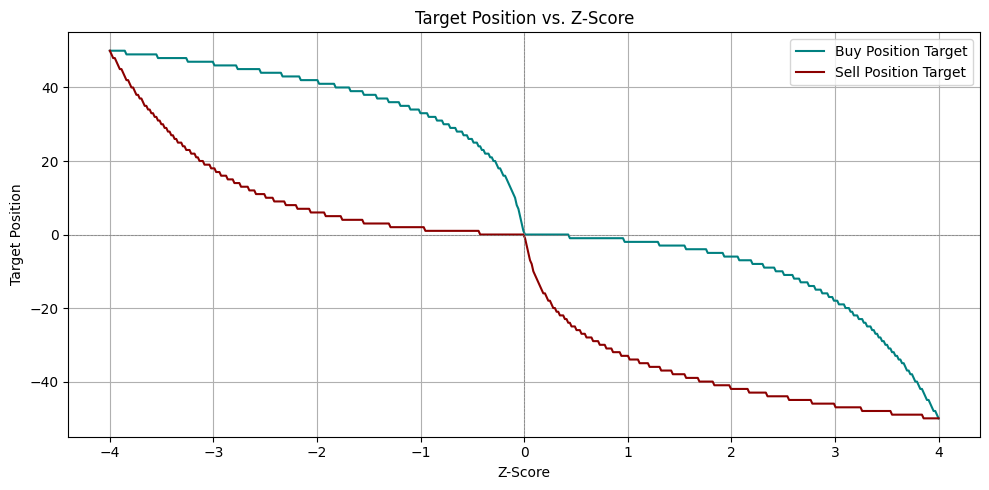

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Z-score range from -4 to 4
z_vals = np.linspace(-4, 4, 500)
k = 4  # Same as in your strategy

# Apply leaf functions and scale
buy_positions = buy_leaf(z_vals / 4, k) * 50
sell_positions = sell_leaf(z_vals / 4, k) * 50

# Round to integer positions for visualization (optional)
buy_positions_rounded = np.round(buy_positions).astype(int)
sell_positions_rounded = np.round(sell_positions).astype(int)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(z_vals, buy_positions_rounded, label='Buy Position Target', color='teal')
plt.plot(z_vals, sell_positions_rounded, label='Sell Position Target', color='darkred')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)

plt.title("Target Position vs. Z-Score")
plt.xlabel("Z-Score")
plt.ylabel("Target Position")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/8_/hy2vymsj6vxdlz1rqbn0zz5h0000gn/T/ipykernel_4883/3905811641.py:12: RuntimeWarning: invalid value encountered in log
  -1 / k * np.log(-y * denom + 1),
/var/folders/8_/hy2vymsj6vxdlz1rqbn0zz5h0000gn/T/ipykernel_4883/3905811641.py:13: RuntimeWarning: invalid value encountered in log
  1 / k * np.log(y * denom + 1))


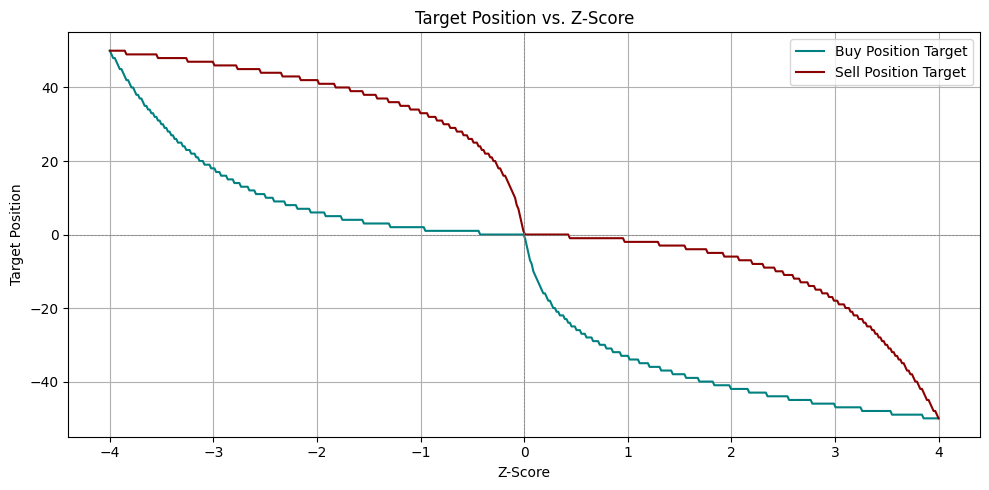

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def exp_leaf(x, k):
    y = np.where(x < 0, -(np.exp(-k * x) - 1), np.exp(k * x) - 1)
    return y / (np.exp(k) - 1)

def exp_leaf_inverse(y, k):
    y = np.clip(y, -1, 1)
    denom = np.exp(k) - 1
    return np.where(y < 0,
                    -1 / k * np.log(-y * denom + 1),
                     1 / k * np.log(y * denom + 1))

# Buy curve: inverse on left, exp on right
def buy_leaf_new(x, k):
    x = np.clip(x, -1, 1)
    y = np.zeros_like(x)
    y[x < 0] = exp_leaf(x[x < 0], k)
    y[x >= 0] = exp_leaf_inverse(x[x >= 0], k)
    return -y

# Sell curve: original on left, inverse on right
def sell_leaf_new(x, k):
    x = np.clip(x, -1, 1)
    y = np.zeros_like(x)
    y[x < 0] = exp_leaf_inverse(x[x < 0], k)
    y[x >= 0] = exp_leaf(x[x >= 0], k)
    return -y



# Z-score range from -4 to 4
z_vals = np.linspace(-4, 4, 500)
k = 4  # Same as in your strategy

# Apply leaf functions and scale
buy_positions = buy_leaf_new(z_vals / 4, k) * 50
sell_positions = sell_leaf_new(z_vals / 4, k) * 50

# Round to integer positions for visualization (optional)
buy_positions_rounded = np.round(buy_positions).astype(int)
sell_positions_rounded = np.round(sell_positions).astype(int)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(z_vals, buy_positions_rounded, label='Buy Position Target', color='teal')
plt.plot(z_vals, sell_positions_rounded, label='Sell Position Target', color='darkred')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)

plt.title("Target Position vs. Z-Score")
plt.xlabel("Z-Score")
plt.ylabel("Target Position")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
